256


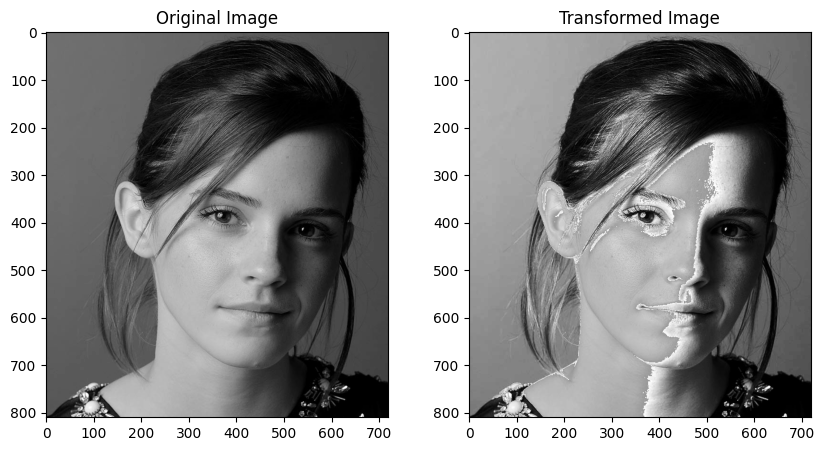

True

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the breakpoints for the intensity transformation
c = np.array([(50, 100), (150, 255)])

# Create the transformation function for each segment
t1 = np.linspace(0, c[0,0], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,0] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0] + 1, 255, 255 - c[1,0]).astype('uint8')

# Combine the transformations
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

# Print the length of the transformation (it should be 256, one for each intensity level)
print(len(transform))

# Load the grayscale image
img_orig = cv.imread(r'C:\Users\USER\Desktop\Lectures\SEM 5\EN3160 - Image Processing and Machine Vision\Assignment 1\Intensity_Transformation\Img\emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the intensity transformation using cv.LUT
image_transformed = cv.LUT(img_orig, transform)

# Display the original and transformed image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')

plt.show()

# Save the result
cv.imwrite('image_transformed.jpg', image_transformed)


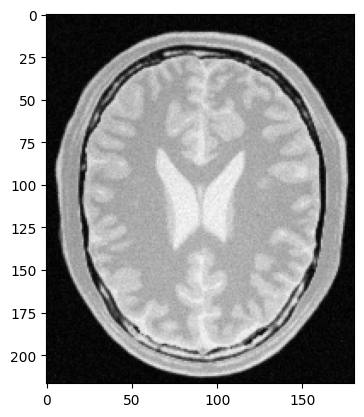

In [37]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\USER\Desktop\Lectures\SEM 5\EN3160 - Image Processing and Machine Vision\Assignment 1\Intensity_Transformation\Img\brain_proton_density_slice.png"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)


# Display the image
plt.imshow(image, cmap='gray')
plt.show()


Intensity at point White Matter: 170
Intensity at point Gray Matter: 225


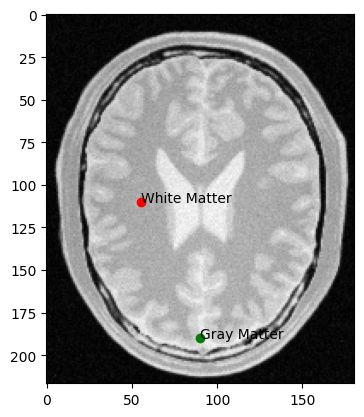

In [38]:
# Define the coordinates of the two points
point1 = (55, 110)  
point2 = (90, 190)  

# Get the intensity values at the two points
intensity1 = image[point1[1], point1[0]]
intensity2 = image[point2[1], point2[0]]

# Print the intensity values
print("Intensity at point White Matter:", intensity1)
print("Intensity at point Gray Matter:", intensity2)

# Display the image with marked points
plt.imshow(image, cmap='gray')  # Display the grayscale image
plt.plot(point1[0], point1[1], 'ro')  # Mark point 1 with a red dot
plt.annotate('White Matter', (point1[0], point1[1]))  
plt.plot(point2[0], point2[1], 'go')  # Mark point 2 with a green dot
plt.annotate('Gray Matter', (point2[0], point2[1])) 
plt.show()

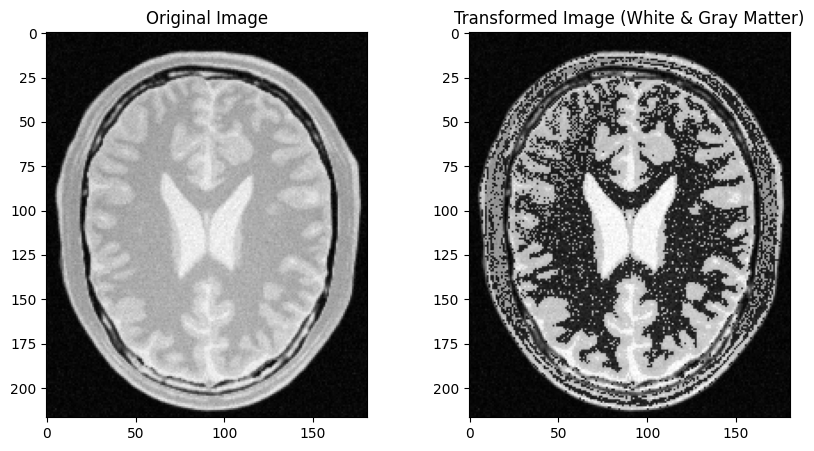

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define intensity breakpoints and corresponding output values
# White matter (170 ± 10) -> map to low intensity 
# Gray matter (225 ± 10) -> map to high intensity
# All other intensities -> leave unchanged


white_matter_start, white_matter_end = 170 - 10, 170 + 10
gray_matter_start, gray_matter_end = 225 - 10, 225 + 10


# Transformation function for the white matter and gray matter
transform = np.arange(256).astype('uint8')

# White matter transformation (linear interpolation)
transform[white_matter_start:white_matter_end + 1] = np.linspace(20, 50, white_matter_end - white_matter_start + 1).astype('uint8')

# Gray matter transformation (linear interpolation)
transform[gray_matter_start:gray_matter_end + 1] = np.linspace(230, 255, gray_matter_end - gray_matter_start + 1).astype('uint8')

# Apply the transformation to the entire image
transformed_img = cv2.LUT(img, transform)

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Transformed Image (White & Gray Matter)')
plt.imshow(transformed_img, cmap='gray')
plt.show()


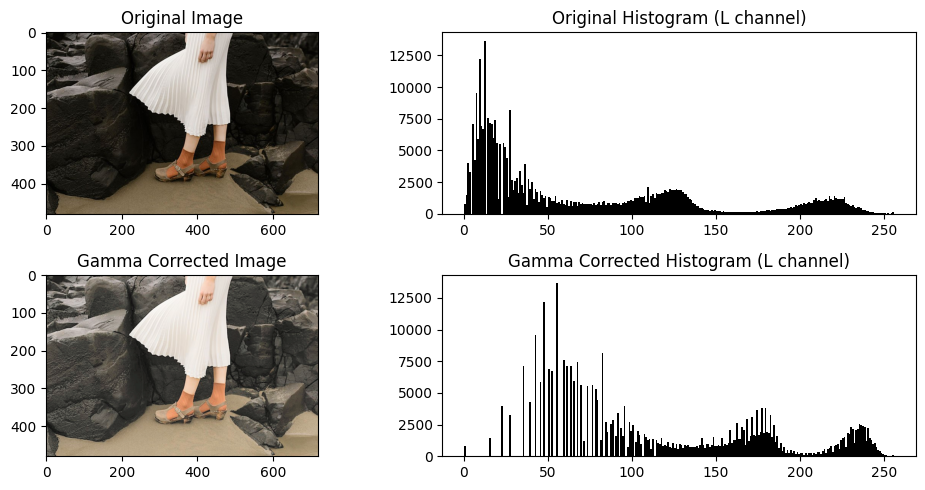

In [41]:
# Load the image
image_path = r'C:\Users\USER\Desktop\Lectures\SEM 5\EN3160 - Image Processing and Machine Vision\Assignment 1\Intensity_Transformation\Img\highlights_and_shadows.jpg'
img = cv2.imread(image_path)

# Convert the image to L*a*b* color space
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Extract the L (lightness) channel
L, a, b = cv2.split(lab_image)

# Apply gamma correction
gamma = 0.5  # You can adjust gamma value
L_gamma_corrected = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the modified L channel back with the original a and b channels
lab_image_gamma_corrected = cv2.merge((L_gamma_corrected, a, b))

# Convert back to BGR color space for display
img_gamma_corrected = cv2.cvtColor(lab_image_gamma_corrected, cv2.COLOR_LAB2BGR)

# Plot the original and gamma corrected images with histograms
plt.figure(figsize=(10, 5))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('Original Histogram (L channel)')
plt.hist(L.ravel(), bins=256, range=[0, 256], color='black')

# Gamma corrected image and histogram
plt.subplot(2, 2, 3)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(img_gamma_corrected, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title('Gamma Corrected Histogram (L channel)')
plt.hist(L_gamma_corrected.ravel(), bins=256, range=[0, 256], color='black')

plt.tight_layout()
plt.show()